In [2]:
#Name: Kholeigh Foster
#Midterm: The Impact of Race, Age, and Gender on One's Likelihood to be Arrested

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
adult_arrests = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning, Bias, & Ethics/Adult_Arrests.csv')

<ipython-input-5-eff5cf4b9fda>:1: DtypeWarning: Columns (7,20,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  adult_arrests = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning, Bias, & Ethics/Adult_Arrests.csv')


In [6]:
adult_arrests.head()

,TYPE,YEAR,DATE_,HOUR,CCN,ARREST_NUMBER,AGE,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,...,ARREST_LONGITUDE,OFFENSE_LATITUDE,OFFENSE_LONGITUDE,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,GLOBALID,OBJECTID
0,Adult Arrest,2013,2013/11/14 05:00:00+00,6,45bb932cb42f1bba872a8dfcfb2428a10d6fe0598a63f2...,1057043c3187ebc5c85920edbb441300e1446d3764e70f...,37,Out of State,Out of State,WHITE,...,NaN,NaN,NaN,ADULT_ARRESTS_1,NaN,NaN,JLAY,2023/09/27 21:18:52+00,{80CA3650-32C9-42C6-8412-9250D0E433BF},1
1,Adult Arrest,2013,2013/11/20 05:00:00+00,15,d558ea651a7b32e88571a453ccdf39376b2ec9dfb11f3c...,ad3f22534b1e2c409d66328bb4ac3904e9bacc768c6091...,39,602,6D,BLACK,...,NaN,NaN,NaN,ADULT_ARRESTS_2,NaN,NaN,JLAY,2023/09/27 21:18:52+00,{F1B2E42E-38B5-49D6-8A60-BF8CF0690A12},2
2,Adult Arrest,2013,2013/12/03 05:00:00+00,0,85451f87475b042563ddebc20b89b7258f07bca9b55b77...,a723e9f1d0b44a6e0cef81994b8e7d3d3da55270e6f871...,40,Out of State,Out of State,BLACK,...,NaN,NaN,NaN,ADULT_ARRESTS_3,NaN,NaN,JLAY,2023/09/27 21:18:52+00,{7F8BA37F-51F5-437F-A8F4-4B755385797B},3
3,Adult Arrest,2013,2013/12/05 05:00:00+00,21,3498c726acd19b8fc48c50a86c4e21e5823c41722cb779...,1a94d5a92f8538d3252aa65690ab70fac1a67646eb22ee...,65,502,5D,BLACK,...,NaN,NaN,NaN,ADULT_ARRESTS_4,NaN,NaN,JLAY,2023/09/27 21:18:52+00,{70B94138-C9F4-4CFF-9A72-12B071F3A78C},4
4,Adult Arrest,2013,2013/12/09 05:00:00+00,23,88e342ab716f545b67c467914d6999d514ec6ea34d5c2e...,5a0e432aaa38e011a7b8aa29de617d4e635acab29b3db5...,31,702,7D,BLACK,...,NaN,NaN,NaN,ADULT_ARRESTS_5,NaN,NaN,JLAY,2023/09/27 21:18:52+00,{2DCB5E7E-311F-48B8-A36B-BF1D6C2890F5},5


In [7]:
#drop columns that are not essential to answering research question

colums_drop = ['ARREST_NUMBER','CCN', 'DEFENDANT_PSA','ARREST_LONGITUDE', 'OFFENSE_LATITUDE', 'OFFENSE_LONGITUDE','GIS_ID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'GLOBALID','OBJECTID']
adult_arrests = adult_arrests.drop(columns=colums_drop)


In [8]:
adult_arrests.head()

,TYPE,YEAR,DATE_,HOUR,AGE,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,CATEGORY,DESCRIPTION,ARREST_PSA,ARREST_DISTRICT,ARREST_BLOCKX,ARREST_BLOCKY,OFFENSE_BLOCKY,OFFENSE_BLOCKX,OFFENSE_PSA,OFFENSE_DISTRICT,ARREST_LATITUDE
0,Adult Arrest,2013,2013/11/14 05:00:00+00,6,37,Out of State,WHITE,NOT HISPANIC,MALE,Sex Abuse,Second Degree Sex Abuse- Incompetent,102.0,1D,398600.0,136300.0,NaN,NaN,NaN,NaN,NaN
1,Adult Arrest,2013,2013/11/20 05:00:00+00,15,39,6D,BLACK,NaN,MALE,Homicide,Murder I,602.0,6D,405900.0,137300.0,NaN,NaN,602.0,6D,NaN
2,Adult Arrest,2013,2013/12/03 05:00:00+00,0,40,Out of State,BLACK,NaN,MALE,Prostitution,Solicting Prostitution,103.0,1D,399200.0,137200.0,NaN,NaN,NaN,NaN,NaN
3,Adult Arrest,2013,2013/12/05 05:00:00+00,21,65,5D,BLACK,NaN,MALE,rcotics,Ucsa Pwid Heroin,102.0,1D,398400.0,136900.0,NaN,NaN,NaN,NaN,NaN
4,Adult Arrest,2013,2013/12/09 05:00:00+00,23,31,7D,BLACK,NOT HISPANIC,MALE,Traffic Violations,No Permit,204.0,2D,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#remove any remaining columns that are not essential to dataset
columns_drop = ['ARREST_PSA', 'ARREST_BLOCKX', 'ARREST_BLOCKY', 'OFFENSE_BLOCKY','OFFENSE_BLOCKX', 'OFFENSE_PSA', 'ARREST_LATITUDE']
adult_arrests = adult_arrests.drop(columns=columns_drop)

In [10]:
adult_arrests.head(60)

,TYPE,YEAR,DATE_,HOUR,AGE,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,CATEGORY,DESCRIPTION,ARREST_DISTRICT,OFFENSE_DISTRICT
0,Adult Arrest,2013,2013/11/14 05:00:00+00,6,37,Out of State,WHITE,NOT HISPANIC,MALE,Sex Abuse,Second Degree Sex Abuse- Incompetent,1D,NaN
1,Adult Arrest,2013,2013/11/20 05:00:00+00,15,39,6D,BLACK,NaN,MALE,Homicide,Murder I,6D,6D
2,Adult Arrest,2013,2013/12/03 05:00:00+00,0,40,Out of State,BLACK,NaN,MALE,Prostitution,Solicting Prostitution,1D,NaN
3,Adult Arrest,2013,2013/12/05 05:00:00+00,21,65,5D,BLACK,NaN,MALE,rcotics,Ucsa Pwid Heroin,1D,NaN
4,Adult Arrest,2013,2013/12/09 05:00:00+00,23,31,7D,BLACK,NOT HISPANIC,MALE,Traffic Violations,No Permit,2D,NaN
5,Adult Arrest,2013,2013/12/10 05:00:00+00,2,25,7D,BLACK,NOT HISPANIC,FEMALE,Driving/Boating While Intoxicated,Dui - Refusing Test,NaN,NaN
6,Adult Arrest,2013,2013/12/11 05:00:00+00,1,47,7D,BLACK,NaN,MALE,Prostitution,Pandering A Minor,7D,NaN
7,Adult Arrest,2013,2013/12/17 05:00:00+00,10,33,4D,WHITE,NOT HISPANIC,MALE,Assault on a Police Officer,Apo (misd),4D,NaN
8,Adult Arrest,2013,2013/12/21 05:00:00+00,23,54,6D,BLACK,NOT HISPANIC,FEMALE,Driving/Boating While Intoxicated,Driving Under Influence-1st Off,NaN,2D
9,Adult Arrest,2013,2013/12/28 05:00:00+00,21,22,6D,BLACK,NOT HISPANIC,MALE,Release Violations/Fugitive,Fugitive From Justice,6D,NaN


In [11]:
adult_arrests.tail(30)

,TYPE,YEAR,DATE_,HOUR,AGE,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,CATEGORY,DESCRIPTION,ARREST_DISTRICT,OFFENSE_DISTRICT
259845,Adult Arrest,2022,2022/12/31 05:00:00+00,6,46,NaN,WHITE,UNKNOWN,MALE,Simple Assault,Simple Assault,4D,4D
259846,Adult Arrest,2022,2022/12/31 05:00:00+00,7,20,NaN,WHITE,UNKNOWN,FEMALE,Driving/Boating While Intoxicated,Driving Under Influence-1st Off,2D,2D
259847,Adult Arrest,2022,2022/12/31 05:00:00+00,8,38,NaN,BLACK,UNKNOWN,MALE,Release Violations/Fugitive (Warr),Fugitive From Justice,4D,4D
259848,Adult Arrest,2022,2022/12/31 05:00:00+00,8,44,NaN,BLACK,NOT HISPANIC,MALE,Theft,Theft Second Degree (all Other Larceny),5D,5D
259849,Adult Arrest,2022,2022/12/31 05:00:00+00,11,47,1D,BLACK,NOT HISPANIC,MALE,Theft,Theft Second Degree (all Other Larceny),5D,5D
259850,Adult Arrest,2022,2022/12/31 05:00:00+00,11,29,NaN,BLACK,NOT HISPANIC,MALE,Simple Assault,Simple Assault,4D,4D
259851,Adult Arrest,2022,2022/12/31 05:00:00+00,12,24,1D,BLACK,NOT HISPANIC,MALE,Simple Assault,Threats To Do Bodily Harm -misd,7D,7D
259852,Adult Arrest,2022,2022/12/31 05:00:00+00,15,47,NaN,BLACK,UNKNOWN,MALE,Traffic Violations,Counterfeit Tags,1D,2D
259853,Adult Arrest,2022,2022/12/31 05:00:00+00,17,26,7D,BLACK,NOT HISPANIC,MALE,Weapon Violations,CPWOL Outside Home or Business (Prior Felony) ...,7D,7D
259854,Adult Arrest,2022,2022/12/31 05:00:00+00,17,30,3D,BLACK,NOT HISPANIC,MALE,Weapon Violations,CPWOL Outside Home or Business (Prior Felony) ...,5D,5D


In [12]:
#drop Ethnicity column
columns_drop = ['ETHNICITY']
adult_arrests = adult_arrests.drop(columns=columns_drop)

In [13]:
#check for missing values
adult_arrests.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259875 entries, 0 to 259874
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   TYPE                259875 non-null  object
 1   YEAR                259875 non-null  int64 
 2   DATE_               259875 non-null  object
 3   HOUR                259875 non-null  int64 
 4   AGE                 259875 non-null  int64 
 5   DEFENDANT_DISTRICT  225022 non-null  object
 6   RACE                259875 non-null  object
 7   SEX                 259875 non-null  object
 8   CATEGORY            259863 non-null  object
 9   DESCRIPTION         259834 non-null  object
 10  ARREST_DISTRICT     258285 non-null  object
 11  OFFENSE_DISTRICT    259337 non-null  object
dtypes: int64(3), object(9)
memory usage: 23.8+ MB


In [14]:
#drop rows with NaN values in specified column

adult_arrests.dropna(subset=['DEFENDANT_DISTRICT', 'HOUR', 'DEFENDANT_DISTRICT','CATEGORY','DESCRIPTION','ARREST_DISTRICT','OFFENSE_DISTRICT'], inplace=True)

In [15]:
#check for missing values again
adult_arrests.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 223424 entries, 1 to 259874
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   TYPE                223424 non-null  object
 1   YEAR                223424 non-null  int64 
 2   DATE_               223424 non-null  object
 3   HOUR                223424 non-null  int64 
 4   AGE                 223424 non-null  int64 
 5   DEFENDANT_DISTRICT  223424 non-null  object
 6   RACE                223424 non-null  object
 7   SEX                 223424 non-null  object
 8   CATEGORY            223424 non-null  object
 9   DESCRIPTION         223424 non-null  object
 10  ARREST_DISTRICT     223424 non-null  object
 11  OFFENSE_DISTRICT    223424 non-null  object
dtypes: int64(3), object(9)
memory usage: 22.2+ MB


In [16]:
# check unique values in the 'CATEGORY' column
unique_categories = adult_arrests['CATEGORY'].unique()
print(unique_categories)


['Homicide' 'Release Violations/Fugitive' 'Traffic Violations'
 'Prostitution' 'Simple Assault' ' rcotics' 'Burglary'
 'Driving/Boating While Intoxicated' 'Assault with a Dangerous Weapon'
 'Liquor Law Violations' 'Theft' 'Aggravated Assault'
 'Assault on a Police Officer' 'Sex Offenses' 'Property Crimes'
 'Weapon Violations' 'Disorderly Conduct' 'Motor Vehicle Theft'
 'Other Crimes' 'Damage to Property' 'Offenses Against Family & Children'
 'Robbery' 'Sex Abuse' 'Kid pping' 'Gambling' 'Vending Violations'
 'Theft from Auto' 'Fraud and Fi ncial Crimes' 'Arson' 'Narcotics'
 'Fraud and Financial Crimes' 'Kidnapping'
 'Release Violations/Fugitive (Warr)' 'Release Violations/Fugitive (Fug)'
 'Fraud and Financial Crimes (Frau)' 'Fraud and Financial Crimes (Forg)'
 'Fraud and Financial Crimes (Coun)' 'Release Violations']


In [17]:
adult_arrests = adult_arrests[adult_arrests['CATEGORY'] != ' rcotics']

In [18]:
#collect summary statistics on independent variables age (continuous varieble)
age_summary = adult_arrests.describe()

#frequency distributions for categorical variables (race & gender)
race_counts = adult_arrests['RACE'].value_counts()
gender_counts = adult_arrests['SEX'].value_counts()
category_counts = adult_arrests['CATEGORY'].value_counts()

#print results
print(age_summary)
print(race_counts)
print(gender_counts)
print(category_counts)



                YEAR           HOUR            AGE
count  206709.000000  206709.000000  206709.000000
mean     2016.567876      11.987088      34.883421
std         2.594545       7.071180      12.544427
min      2013.000000       0.000000      18.000000
25%      2014.000000       6.000000      25.000000
50%      2016.000000      12.000000      32.000000
75%      2018.000000      18.000000      43.000000
max      2022.000000      23.000000     121.000000
RACE
BLACK       180569
WHITE        16517
UNK           7171
UNKNOWN       1244
ASIAN         1094
OTHER           95
MULTIPLE        19
Name: count, dtype: int64
SEX
MALE       158017
FEMALE      48485
UNK           162
UNKNOWN        45
Name: count, dtype: int64
CATEGORY
Simple Assault                        49700
Release Violations/Fugitive           28684
Traffic Violations                    26706
Theft                                 12729
Other Crimes                          10620
Driving/Boating While Intoxicated      9057
We

In [19]:
#encode categorical variables 'race' and 'gender'
#use one-hot encoding for 'race' column
race_encoded = pd.get_dummies(adult_arrests['RACE'], prefix= 'RACE')
gender_encoded = pd.get_dummies(adult_arrests ['SEX'], prefix= 'SEX')
category_encoded = pd.get_dummies(adult_arrests ['CATEGORY'], prefix= 'CATEGORY')

#cocatenate the encoded columns into the df (simply combine to riginal df to contain both columns)
adult_arrests_encoded = pd.concat([adult_arrests, race_encoded, gender_encoded, category_encoded], axis=1)

#store mapping between original categories and encoded dummy variables (this allows for referencing the correspondence between the original columsn and the dummy columns)
race_mapping = race_encoded.columns.tolist()
gender_mapping = gender_encoded.columns.tolist()
category_mapping = category_encoded.columns.tolist()
#print encoded df
print(adult_arrests_encoded)

#if a value of one then it represents that the individual is that race or gender

                TYPE  YEAR                   DATE_  HOUR  AGE  \
1       Adult Arrest  2013  2013/11/20 05:00:00+00    15   39   
13      Adult Arrest  2013  2013/01/29 05:00:00+00    15   53   
14      Adult Arrest  2013  2013/04/15 04:00:00+00    19   35   
15      Adult Arrest  2013  2013/08/14 04:00:00+00    17   28   
16      Adult Arrest  2013  2013/08/24 04:00:00+00     1   43   
...              ...   ...                     ...   ...  ...   
259870  Adult Arrest  2022  2022/12/31 05:00:00+00    23   37   
259871  Adult Arrest  2022  2022/12/31 05:00:00+00    23   33   
259872  Adult Arrest  2022  2022/12/31 05:00:00+00    23   31   
259873  Adult Arrest  2022  2022/12/31 05:00:00+00    23   18   
259874  Adult Arrest  2022  2022/12/31 05:00:00+00    23   38   

       DEFENDANT_DISTRICT   RACE     SEX                     CATEGORY  \
1                      6D  BLACK    MALE                     Homicide   
13           Out of State  BLACK    MALE  Release Violations/Fugitive   


In [20]:
# define dictionary to map incorrect column names to correct column names
column_mapping = {
    'CATEGORY_ rcotics': 'CATEGORY_Narcotics',
    'CATEGORY_Fraud and Fi ncial Crimes': 'CATEGORY_Fraud and Financial Crimes',
    # Add more mappings for other incorrect column names
}

# rename columns in the df using the mapping dictionary
adult_arrests_encoded.rename(columns=column_mapping, inplace=True)

print(adult_arrests_encoded)

                TYPE  YEAR                   DATE_  HOUR  AGE  \
1       Adult Arrest  2013  2013/11/20 05:00:00+00    15   39   
13      Adult Arrest  2013  2013/01/29 05:00:00+00    15   53   
14      Adult Arrest  2013  2013/04/15 04:00:00+00    19   35   
15      Adult Arrest  2013  2013/08/14 04:00:00+00    17   28   
16      Adult Arrest  2013  2013/08/24 04:00:00+00     1   43   
...              ...   ...                     ...   ...  ...   
259870  Adult Arrest  2022  2022/12/31 05:00:00+00    23   37   
259871  Adult Arrest  2022  2022/12/31 05:00:00+00    23   33   
259872  Adult Arrest  2022  2022/12/31 05:00:00+00    23   31   
259873  Adult Arrest  2022  2022/12/31 05:00:00+00    23   18   
259874  Adult Arrest  2022  2022/12/31 05:00:00+00    23   38   

       DEFENDANT_DISTRICT   RACE     SEX                     CATEGORY  \
1                      6D  BLACK    MALE                     Homicide   
13           Out of State  BLACK    MALE  Release Violations/Fugitive   


In [21]:
#print the mappings for future reference
print("Race Mapping:")
print(race_mapping)
print("\nGender Mapping:")
print(gender_mapping)
print("Category Mapping:")
print(category_mapping)

Race Mapping:
['RACE_ASIAN', 'RACE_BLACK', 'RACE_MULTIPLE', 'RACE_OTHER', 'RACE_UNK', 'RACE_UNKNOWN', 'RACE_WHITE']

Gender Mapping:
['SEX_FEMALE', 'SEX_MALE', 'SEX_UNK', 'SEX_UNKNOWN']
Category Mapping:
['CATEGORY_Aggravated Assault', 'CATEGORY_Arson', 'CATEGORY_Assault on a Police Officer', 'CATEGORY_Assault with a Dangerous Weapon', 'CATEGORY_Burglary', 'CATEGORY_Damage to Property', 'CATEGORY_Disorderly Conduct', 'CATEGORY_Driving/Boating While Intoxicated', 'CATEGORY_Fraud and Fi ncial Crimes', 'CATEGORY_Fraud and Financial Crimes', 'CATEGORY_Fraud and Financial Crimes (Coun)', 'CATEGORY_Fraud and Financial Crimes (Forg)', 'CATEGORY_Fraud and Financial Crimes (Frau)', 'CATEGORY_Gambling', 'CATEGORY_Homicide', 'CATEGORY_Kid pping', 'CATEGORY_Kidnapping', 'CATEGORY_Liquor Law Violations', 'CATEGORY_Motor Vehicle Theft', 'CATEGORY_Narcotics', 'CATEGORY_Offenses Against Family & Children', 'CATEGORY_Other Crimes', 'CATEGORY_Property Crimes', 'CATEGORY_Prostitution', 'CATEGORY_Release 

In [22]:
from sklearn.model_selection import train_test_split

#X contains your features and y contains your target variable
X = adult_arrests_encoded[['RACE_ASIAN', 'RACE_BLACK', 'RACE_MULTIPLE', 'RACE_OTHER', 'RACE_UNK', 'RACE_UNKNOWN', 'RACE_WHITE', 'SEX_FEMALE', 'SEX_MALE', 'SEX_UNK', 'SEX_UNKNOWN']]
y = adult_arrests_encoded[['CATEGORY_Aggravated Assault']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure the number of samples is consistent
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))
print("Number of samples in X_test:", len(X_test))
print("Number of samples in y_test:", len(y_test))


Number of samples in X_train: 165367
Number of samples in y_train: 165367
Number of samples in X_test: 41342
Number of samples in y_test: 41342


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and fit logistic regression model
model = LogisticRegression(multi_class='ovr')  # Use 'multinomial' for a softmax regression model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # or 'micro', 'weighted'
recall = recall_score(y_test, y_pred, average='macro')  # or 'micro', 'weighted'
f1 = f1_score(y_test, y_pred, average='macro')  # or 'micro', 'weighted'
roc_auc = roc_auc_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9926467031106381
Precision: 0.49632335155531904
Recall: 0.5
F1 Score: 0.4981548919640689
ROC AUC Score: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and fit logistic regression model
model = LogisticRegression(multi_class='ovr')  # Use 'multinomial' for a softmax regression model
model.fit(X_train, y_train.values.ravel())  # Reshape y_train to a 1D array

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)  # Suppress UndefinedMetricWarning
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)  # Suppress UndefinedMetricWarning
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)  # Suppress UndefinedMetricWarning
roc_auc = roc_auc_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.9926467031106381
Precision: 0.49632335155531904
Recall: 0.5
F1 Score: 0.4981548919640689
ROC AUC Score: 0.5


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (assuming your dataset is stored in a DataFrame called 'subset_data')
# Replace 'subset_data' with the actual DataFrame containing your data

# Select features and target variable
features = ['RACE', 'SEX']  # Assuming these are your independent variables
X = subset_data[features]
y = subset_data['target']  # Assuming 'target' is your dependent variable

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


NameError: name 'subset_data' is not defined

In [26]:
from sklearn.cluster import KMeans

# Initialize KMeans with the number of clusters you want
kmeans = KMeans(n_clusters=3, random_state=42)  # Change the number of clusters as needed

# Fit KMeans to the data
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
adult_arrests_encoded['cluster'] = cluster_labels

# Now 'adult_arrests_encoded' DataFrame will have a new column 'cluster' indicating the cluster assignment for each data point


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
import matplotlib.pyplot as plt

# Assuming 'X' contains your features and 'labels' contains the cluster labels
# Plotting the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

<Figure size 800x600 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt

# Plotting the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


NameError: name 'labels' is not defined

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


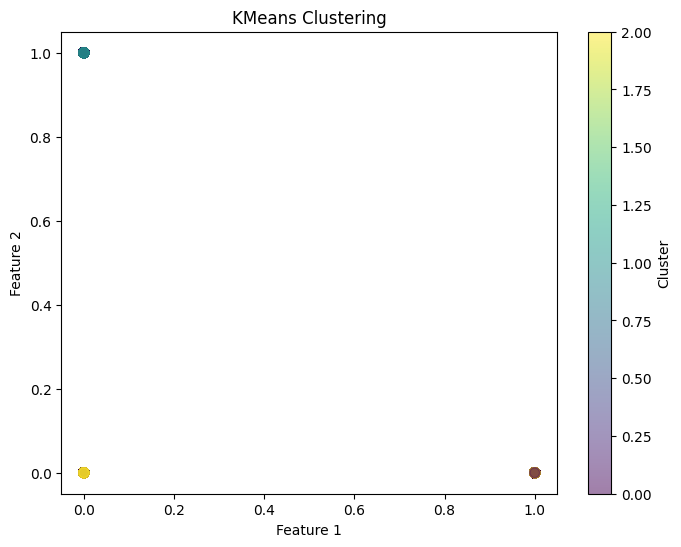

In [29]:
from sklearn.cluster import KMeans

#Perform KMeans clustering
kmeans = KMeans(n_clusters=3)  # Define the number of clusters
kmeans.fit(X)  # Fit the model to your data

#Get cluster labels for each data point
labels = kmeans.labels_

# Plotting the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()
